<a href="https://colab.research.google.com/github/jamiewu128/AIA_Example/blob/master/Todo_Prediction_Advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://jamiewu128@bitbucket.org/jamiewu128/todo_prediction.git

Cloning into 'todo_prediction'...
remote: Counting objects: 42, done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 20), reused 0 (delta 0)
Unpacking objects: 100% (42/42), done.


In [0]:
cd /content/todo_prediction/

/content/todo_prediction


In [0]:
!git pull

remote: Counting objects: 3, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0)
Unpacking objects: 100% (3/3), done.
From https://bitbucket.org/jamiewu128/todo_prediction
   e867af6..4c45a22  master     -> origin/master
Updating e867af6..4c45a22
Fast-forward
 ...33\236\350\246\206\344\272\272\351\227\234\350\201\257_0712.xml" | 6 ++++--
 1 file changed, 4 insertions(+), 2 deletions(-)


In [0]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as et
import jieba
from gensim.models import word2vec
import seaborn as sns
from matplotlib.font_manager import FontProperties

##ToDo清單

In [4]:
xtree = et.parse('/content/todo_prediction/XML_Todo清單_0712.xml')
xroot = xtree.getroot()
df_cols = [
"ID",
"Title",
"AccountID",
"Username",
"DisplayName",
"TodoStatus",
"GroupID",
"GroupName",
"GroupEnabled",
"GroupLevel",
"RootToDoID",
"ParentToDoID",
"ParentAccountID",
"Progress",
"LastProgress",
"AlertType",
"ProgressUpdateTime",
"Description",
"HasDueTime",
"CreatedDateTime",
"LastUpdatedDateTime",
"StartDateTime",
"DueDateTime"]
out_df = pd.DataFrame(columns = df_cols)

for node in xroot:
  col_values = []
  for col_name in df_cols:
    col_values.append(node.attrib.get(col_name))
  out_df = out_df.append(pd.Series(col_values, index = df_cols), ignore_index=True)

print('Total:',len(out_df))
out_df.head()

Total: 3291


,ID,Title,AccountID,Username,DisplayName,TodoStatus,GroupID,GroupName,GroupEnabled,GroupLevel,RootToDoID,ParentToDoID,ParentAccountID,Progress,LastProgress,AlertType,ProgressUpdateTime,Description,HasDueTime,CreatedDateTime,LastUpdatedDateTime,StartDateTime,DueDateTime
0,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,0,1591,APD每週例會報告,1,6,12044,12044,2443,0,0,1,None,,1,2019-07-11T16:53:25.590,2019-07-11T17:27:21.490,2019-07-14T16:00:00,2019-07-22T15:59:59
1,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,0,1591,APD每週例會報告,1,6,12044,12044,2443,0,0,1,None,,1,2019-07-11T16:53:25.590,2019-07-11T17:27:21.490,2019-07-14T16:00:00,2019-07-22T15:59:59
2,13700,OA人員資料同步增加2欄位資料(匯入),11,joyceyu,Joyce Yu,0,1591,APD每週例會報告,1,6,12044,12044,2443,0,0,1,None,,1,2019-07-11T16:45:18.453,2019-07-11T17:26:50.720,2019-07-12T06:00:00,2019-07-22T15:59:59
3,13700,OA人員資料同步增加2欄位資料(匯入),11,joyceyu,Joyce Yu,0,1591,APD每週例會報告,1,6,12044,12044,2443,0,0,1,None,,1,2019-07-11T16:45:18.453,2019-07-11T17:26:50.720,2019-07-12T06:00:00,2019-07-22T15:59:59
4,13699,配合績效專案需提供新api(共5支),11,joyceyu,Joyce Yu,0,1591,APD每週例會報告,1,6,12044,12044,2443,0,0,1,None,,1,2019-07-11T16:35:47.817,2019-07-11T17:26:31.613,2019-07-12T06:00:00,2019-07-22T15:59:59


##ToDo關係人清單

In [5]:
xtree = et.parse('/content/todo_prediction/XML_Todo與負責人關聯_0712.xml')
xroot = xtree.getroot()
member_df_cols = [
    "ID","Title","AccountID","Username","DisplayName","RoleType","EmployeeCode"
]
member_df = pd.DataFrame(columns = member_df_cols)

for node in xroot:
  col_values = []
  for col_name in member_df_cols:
    col_values.append(node.attrib.get(col_name))
  member_df = member_df.append(pd.Series(col_values, index = member_df_cols), ignore_index=True)

print('Total:',len(member_df))
member_df.head()

Total: 6197


,ID,Title,AccountID,Username,DisplayName,RoleType,EmployeeCode
0,13701,OA人員資料增加欄位拋轉(匯出),1,anguswang,Angus Wang,3,01100090
1,13701,OA人員資料增加欄位拋轉(匯出),1,anguswang,Angus Wang,3,01100090
2,13701,OA人員資料增加欄位拋轉(匯出),960,lily,Lily Chou,4,01000073
3,13701,OA人員資料增加欄位拋轉(匯出),3014,janewu,Jane Wu,1,01160047
4,13700,OA人員資料同步增加2欄位資料(匯入),1,anguswang,Angus Wang,3,01100090


##ToDo回覆清單

In [6]:
xtree = et.parse('/content/todo_prediction/XML_Todo與回覆人關聯_0712.xml')
xroot = xtree.getroot()
reply_df_cols = [
    "ID","Title","PostAccount","Username","DisplayName","CommentID","MessageID","ParentID","PostType","MessageStatus","IsReply","RestrictType","RestrictAccounts","Liking","LikeCount","PostedDate","Comment"
]
reply_df = pd.DataFrame(columns = reply_df_cols)

for node in xroot:
  col_values = []
  for col_name in reply_df_cols:
    col_values.append(node.attrib.get(col_name))
  reply_df = reply_df.append(pd.Series(col_values, index = reply_df_cols), ignore_index=True)

print('Total:',len(reply_df))
reply_df.head(100)

Total: 28282


,ID,Title,PostAccount,Username,DisplayName,CommentID,MessageID,ParentID,PostType,MessageStatus,IsReply,RestrictType,RestrictAccounts,Liking,LikeCount,PostedDate,Comment
0,13701,OA人員資料增加欄位拋轉(匯出),1,anguswang,Angus Wang,E116B6B1-55C2-4A53-9E61-320F352147A3,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T17:27:22.1770000,Angus Wang已通過立案審核
1,13701,OA人員資料增加欄位拋轉(匯出),1,anguswang,Angus Wang,E116B6B1-55C2-4A53-9E61-320F352147A3,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T17:27:22.1770000,Angus Wang已通過立案審核
2,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,5736DA5A-E75C-4557-946B-F9AC7942042D,2D16BC52-F29C-40F6-90C7-1EDC0D819615,None,14,0,0,None,,,0,2019-07-11T16:53:25.5500000,建立 [OA人員資料增加欄位拋轉(匯出)] 項目
3,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,5736DA5A-E75C-4557-946B-F9AC7942042D,2D16BC52-F29C-40F6-90C7-1EDC0D819615,None,14,0,0,None,,,0,2019-07-11T16:53:25.5500000,建立 [OA人員資料增加欄位拋轉(匯出)] 項目
4,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,6454F142-38EC-48B8-A6F6-E1F429FA4649,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:26.5700000,將Jane Wu新增為負責人
5,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,6454F142-38EC-48B8-A6F6-E1F429FA4649,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:26.5700000,將Jane Wu新增為負責人
6,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,68D38A7C-344B-44C0-A180-6004CB9B9626,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:27.3200000,將Angus Wang新增為審核人
7,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,68D38A7C-344B-44C0-A180-6004CB9B9626,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:27.3200000,將Angus Wang新增為審核人
8,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,BBF4B839-6E23-4909-ABED-3107B7EADE3B,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:28.0530000,將Lily Chou新增為參與人
9,13701,OA人員資料增加欄位拋轉(匯出),11,joyceyu,Joyce Yu,BBF4B839-6E23-4909-ABED-3107B7EADE3B,2D16BC52-F29C-40F6-90C7-1EDC0D819615,5736DA5A-E75C-4557-946B-F9AC7942042D,14,0,1,None,,,0,2019-07-11T16:53:28.0530000,將Lily Chou新增為參與人


In [0]:
reply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28282 entries, 0 to 28281
Data columns (total 17 columns):
ID                  28282 non-null object
Title               28282 non-null object
PostAccount         28282 non-null object
Username            28282 non-null object
DisplayName         28282 non-null object
CommentID           28282 non-null object
MessageID           28282 non-null object
ParentID            24991 non-null object
PostType            28282 non-null object
MessageStatus       28282 non-null object
IsReply             28282 non-null object
RestrictType        28282 non-null object
RestrictAccounts    28282 non-null object
Liking              28282 non-null object
LikeCount           28282 non-null object
PostedDate          28282 non-null object
Comment             28282 non-null object
dtypes: object(17)
memory usage: 3.7+ MB


# 資料清理

            /// Owner(共同管理人或負責人)
            /// </summary>
            Owner = 1,
            /// <summary>
            /// 職務代理人
            /// </summary>
            Substitute = 2,
            /// <summary>
            /// 審核人
            /// </summary>
            Reviewer = 3,
            /// <summary>
            /// 參與者
            /// </summary>
            Viewer = 4
            
            目標=管理人(RoleType=1)
            項目=負責人(RoleType=1) / 審核人(RoleType=3) / 參與人(RoleType=4)


###過濾出 "目標" 或 "項目"

In [7]:
#目標
project_df=out_df[out_df.ParentToDoID.isna()==True]
print('Project count= ', len(project_df))
#項目
todo_df=out_df[out_df.ParentToDoID.isna()==False] 
print('Todo job count= ',len(todo_df))


Project count=  804
Todo job count=  2487


###去除尚未指定負責人的項目

In [8]:
todo_index=todo_df.index.values
id_temp=[]
for idx in todo_index:
  ttdf=todo_df.loc[[idx]]
  tid=ttdf['ID'].iloc[0]
  member_df_s=member_df[member_df.ID==tid]
  if len(member_df_s[member_df_s.RoleType=='1'])<=0:
    id_temp.append(tid)
    todo_df=todo_df.drop(index=idx,inplace=False)

print('移除後 : ',len(todo_df))

移除後 :  2343


In [0]:
todo_df.columns

Index(['ID', 'Title', 'AccountID', 'Username', 'DisplayName', 'TodoStatus',
       'GroupID', 'GroupName', 'GroupEnabled', 'GroupLevel', 'RootToDoID',
       'ParentToDoID', 'ParentAccountID', 'Progress', 'LastProgress',
       'AlertType', 'ProgressUpdateTime', 'Description', 'HasDueTime',
       'CreatedDateTime', 'LastUpdatedDateTime', 'StartDateTime',
       'DueDateTime'],
      dtype='object')

###找出己完成項目

In [9]:
todo_finished=todo_df[todo_df.TodoStatus=="1"] #狀態為己完成
print('Finished Todo job count= ',len(todo_finished))
print('Not finish yet count= ',(len(todo_df)-len(todo_finished)))
print(todo_finished.head())

todo_progress_100=todo_df[todo_df.TodoStatus=="0"]#在2018/12/4以後, 進度為100%但狀態為未完成
todo_progress_100=todo_progress_100[todo_progress_100.Progress=='100']
print('進度為100%但狀態為未完成　Count=',len(todo_progress_100))
ttt=todo_progress_100.drop(index=731,inplace=True)
#print(len(todo_finished))
#print(len(todo_progress_100))
todo_join=pd.concat([todo_finished,todo_progress_100])
print('合併 Count= ',len(todo_join))
train_df=todo_join

not_finished=todo_df[todo_df.TodoStatus=="0"]
not_finished=not_finished[not_finished.Progress!='100']
print('In-Progress count=',len(not_finished))
print(not_finished)

Finished Todo job count=  1431
Not finish yet count=  912
       ID                     Title  ...        StartDateTime          DueDateTime
31  13673  #19H138 帳戶設定，手機驗證輸入欄位異常。  ...  2019-07-03T16:00:00  2019-07-11T15:59:59
35  13669       #19S205 init GPS 關閉  ...  2019-07-07T16:00:00  2019-07-11T15:59:59
45  13661                AD密碼重設素材製作  ...  2019-07-07T16:00:00  2019-07-09T15:59:59
46  13661                AD密碼重設素材製作  ...  2019-07-07T16:00:00  2019-07-09T15:59:59
47  13660         #4464 調整請款申請_會計流程  ...  2019-07-05T06:00:00  2019-07-10T15:59:59

[5 rows x 23 columns]
進度為100%但狀態為未完成　Count= 33
合併 Count=  1463
In-Progress count= 763
         ID  ...                  DueDateTime
0     13701  ...          2019-07-22T15:59:59
1     13701  ...          2019-07-22T15:59:59
2     13700  ...          2019-07-22T15:59:59
3     13700  ...          2019-07-22T15:59:59
4     13699  ...          2019-07-22T15:59:59
5     13699  ...          2019-07-22T15:59:59
6     13698  ...          2019-07-1

###找出特定群組己完成項目

In [0]:
GroupName='APD每週例會報告'
todo_finished=todo_df[todo_df.TodoStatus=="1"] #狀態為己完成
todo_finished=todo_finished[todo_finished.GroupName==GroupName]
print('Finished Todo job count= ',len(todo_finished))
print('Not finish yet Todo job count= ',(len(todo_df)-len(todo_finished)))
print('GroupName:',todo_finished['GroupName'].unique())
todo_finished.head()
todo_progress_100=todo_df[todo_df.TodoStatus=="0"]
todo_progress_100=todo_progress_100[todo_progress_100.Progress=='100']
todo_progress_100=todo_progress_100[todo_progress_100.GroupName==GroupName]
print('進度為100%但狀態為未完成　Count=',len(todo_progress_100))
todo_join=pd.concat([todo_finished,todo_progress_100])
print('合併 Count= ',len(todo_join))
train_df=todo_join

Finished Todo job count=  766
Not finish yet Todo job count=  1577
GroupName: ['APD每週例會報告']
進度為100%但狀態為未完成　Count= 0
合併 Count=  766


###依群組工作項目資料總數計算

In [0]:
groupbyGid=todo_join.groupby(todo_join.GroupID).size()
groupbyGname=todo_join.groupby(todo_join.GroupName).size()
groupGnameSort=groupbyGname.sort_values()
groupValue=groupbyGid.sort_values()
ggs=pd.DataFrame(groupGnameSort)
ggs

,0
GroupName,
AJA-TeamUp 研究小組,1
cloud 2,1
Taipei:南極任務控制中心,1
當我們同在一起！,1
產品營運一部,1
測試回報與建議,1
GHK-IT,1
我的每週報告,1
Teamup 桌機,1


In [0]:
print('群組總數量= ',len(groupbyGid))

群組總數量=  60


In [0]:
print('擁有工作數量 unique value=',pd.Series(groupValue.values).unique())

擁有工作數量 unique value= [  1   2   3   4   5   6   8   9  10  11  13  14  16  22  47  67  68  83
  88 122 766]


In [0]:
fcount=50
fgid=[]
cgid=[]
for i,v in enumerate(groupValue.values):
  if v >= fcount:
    fgid.append(groupValue.keys()[i])
  else:
    cgid.append(groupValue.keys()[i])
    
#len(todo_join[todo_join.GroupID.isin(fgid)])
#print(len(todo_join[todo_join.GroupID.isin(cgid)]))
cpd=todo_join[todo_join.GroupID.isin(cgid)]
fpd=todo_join[todo_join.GroupID.isin(fgid)]
train_df=fpd

In [0]:
print('擷取群組',fpd.GroupName.unique())
print('工項項目總數大於 ',fcount)
print('擷取資料總筆數',len(fpd))

擷取群組 ['APD每週例會報告' '品牌週報' '集團經營會議' '集團開發專案控管' 'Bonus Control Project' '集團開發聯合會議']
工項項目總數大於  50
擷取資料總筆數 1194


In [0]:
nfgid=not_finished['GroupID'].unique()
pcgid=[]
for ngid in nfgid:
  nff=train_df[train_df.GroupID.isin([ngid])]
  if(len(nff)>0):
    pcgid.append(ngid)
    #print(ngid,' is not in train data')
print(len(pcgid))
valid_df=not_finished[not_finished.GroupID.isin(pcgid)]
print(len(train_df))
print(len(valid_df))

6
1194
193


In [0]:
print('略過群組',cpd.GroupName.unique())
print('資料筆數',len(cpd))

略過群組 ['立蕎目標展開' '來福一號' 'my test' '測試看看' 'CTO-SMD' '包租公' '當我們同在一起！'
 'Gamania Legal' 'GHK主管測試' 'CTO teamup!' 'UI/UX(目標項目管理）' 'terrygroup'
 '我的每週報告' '🤑only michelle2' '相宇沒有香蕉' '🐱' 'GHK-IT' '品牌主管週報' 'TeamUP桌機版'
 'testEric' '社群推廣部' '遊戲橘子-社群推廣部' '🖥服務一部📱' '集團產品暨技術發表/專利說明' 'Teamup 桌機'
 'cto 一般專案&維運' 'Taipei:南極任務控制中心' '年度預算2019' 'ushzhs' 'book life '
 '付醜者聯盟之離線之戰' 'beanfun招商內部溝通群組' 'TeamUp Web Team' 'Swapub' 'cloud test'
 'cloud 2' 'AJA-TeamUp 研究小組' '測試回報與建議' '群募貝果-每週例會 會議記錄' 'bruce' 'test'
 '群募貝果' '我們的國家公園管理處' 'PNT技術研發處' '產品營運一部' 'Candy' 'Gamapay-infra' 'GTW-IT'
 'CTO MG' 'Swapub演習' '資安演習' '集團績效評量會議' '疊疊樂']
資料筆數 269


###找出項目負責人

###找出實際完成時間=FinalDateTime

###估計工作天數(DuteDateTime - StartDateTime)

###訓練資料準備

In [10]:
todo_ids=train_df['ID']
print('id length=',len(todo_ids))

account_id_ls=[]#負責人AccountID(String)
group_id_ls=[]#群組ID(String)
role_3_ls=[]#審核人個數(Integer)
role_4_ls=[]#參與人個數(Integer)
role_M_ls=[]#管理人個數(Integer)
modify_duedate_times_ls=[]#變更截止時間次數(Integer)
modify_worker_times_ls=[]#變更負責人次數(Integer)
modify_progress_times_ls=[]#更新進度次數(Integer)
last_progress_ls=[]#最後一次更新進度(Integer)
working_hours_ls=[]#估計工作時數(Integer)
actual_working_hours_ls=[]#實際工作時數(Integer)
working_days_ls=[]#估計工作天數(float)
actual_working_days_ls=[]#實際工作天數(float)

diff_day_ls=[]

for tid in todo_ids:
  d=todo_join[todo_join.ID==tid]
  
  #title_txt.append(d['Title'].iloc[0])#Title
  
  group_id=d['GroupID'].iloc[0]
  parane_todo_id=d['ParentToDoID'].iloc[0]
  reply_df_s=reply_df[reply_df.ID==tid]
  
  c_member=member_df[member_df.ID==tid]
  p_member=member_df[member_df.ID==parane_todo_id]
  
  role_1=c_member[c_member.RoleType=='1']
  role_3=c_member[c_member.RoleType=='3']
  role_4=c_member[c_member.RoleType=='4']
  
  worker_account_id=role_1['AccountID'].iloc[0]
  worker_employee_id=role_1['EmployeeCode'].iloc[0]
  
  account_id_ls.append(worker_account_id)
  group_id_ls.append(group_id)
  
  role_1_count=len(role_1)#負責人
  role_3_count=len(role_3)#審核人
  role_4_count=len(role_4)#參與人
  
  role_M_count=len(p_member[p_member.RoleType=='1'])#管理人
  
  role_3_ls.append(int(role_3_count))
  role_4_ls.append(int(role_4_count))
  role_M_ls.append(int(role_M_count))
  
  if(role_3_count>0):
    comments=reply_df_s[reply_df_s['Comment'].str.contains('已通過項目的驗收')]
    if(len(comments)==0):
      comments=reply_df_s[reply_df_s['Comment'].str.contains('工作已完成驗收')] #因為程式版本改動產生不同的工作驗收顯示詞句
      
    if(len(comments)==1):
      finish_time=comments['PostedDate'].iloc[len(comments)-1]
    else:
      finish_time=d['ProgressUpdateTime'].iloc[0]
    
    #print('PostedDate: ',finish_time)
    
  else:
    finish_time=d['ProgressUpdateTime'].iloc[0]
    #print('ProgressUpdateTime: ',finish_time)
    #final_date_obj = datetime.datetime.strptime(finish_time, '%Y-%m-%dT%H:%M:%S.%f')
    
  final_date_obj = datetime.datetime.strptime(finish_time[:19], '%Y-%m-%dT%H:%M:%S')
    
  comments=reply_df_s[reply_df_s['Comment'].str.contains('變更了截止時間')]
  modify_duedate_times=len(comments)
  modify_duedate_times_ls.append(int(modify_duedate_times))
  #print('變更截止時間次數:',modify_duedate_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('將負責人由')]
  modify_worker_times=len(comments)
  modify_worker_times_ls.append(int(modify_worker_times))
  #print('變更負責人次數:',modify_worker_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('更新了進度')]
  modify_progress_times=len(comments)
  modify_progress_times_ls.append(int(modify_progress_times))
  #print('更新了進度次數:',modify_progress_times)

  last_progress=d['LastProgress'].iloc[0]
  last_progress_ls.append(int(last_progress))

  start_date=d['StartDateTime'].iloc[0]
  due_date=d['DueDateTime'].iloc[0]
  #print('DueDateTime: ',due_date)
  start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M:%S')
  due_date_obj = datetime.datetime.strptime(due_date[:19], '%Y-%m-%dT%H:%M:%S')
  
  
  diff1=due_date_obj-start_date_obj
  diff2=final_date_obj-start_date_obj
  
  #one day = 86400s
  diff1InDays=(diff1.total_seconds() / 86400)#估計完成天數
  diff2InDays=(diff2.total_seconds() / 86400)#實際完成天數
  diff1InHours=(diff1.total_seconds() / 3600)#估計完成時數
  diff2InHours=(diff2.total_seconds() / 3600)#實際完成時數
  
  if(diff2InDays<=0):
    print(d['Title'])
    print(d['StartDateTime'])
    print(d['ProgressUpdateTime'])
    print('final_date_obj: ',final_date_obj)
    print('start_date_obj: ',start_date_obj)
    print('diff2InDays=',diff2InDays)

  
  working_hours_ls.append(diff1InHours)
  actual_working_hours_ls.append(diff2InHours)
  working_days_ls.append(diff1InDays)
  actual_working_days_ls.append(diff2InDays)
  
  diff_day_ls.append((diff1InDays-diff2InDays))
  
print(len(actual_working_days_ls))
measure=working_days_ls

id length= 1463
199    222222
Name: Title, dtype: object
199    2019-06-17T16:00:00
Name: StartDateTime, dtype: object
199    2019-06-17T10:17:55.360
Name: ProgressUpdateTime, dtype: object
final_date_obj:  2019-06-17 10:17:55
start_date_obj:  2019-06-17 16:00:00
diff2InDays= -0.23755787037037038
222    海海
Name: Title, dtype: object
222    2019-06-14T10:00:00
Name: StartDateTime, dtype: object
222    2019-06-14T09:32:22.073
Name: ProgressUpdateTime, dtype: object
final_date_obj:  2019-06-14 09:32:22
start_date_obj:  2019-06-14 10:00:00
diff2InDays= -0.019189814814814816
1463


In [0]:
#正規化
from sklearn import preprocessing

role_3_scaled=preprocessing.minmax_scale(role_3_ls,axis=0,feature_range=(0, 1))
role_4_scaled=preprocessing.minmax_scale(role_4_ls,axis=0,feature_range=(0, 1))
role_M_scaled=preprocessing.minmax_scale(role_M_ls,axis=0,feature_range=(0, 1))
modify_duedate_times_scaled=preprocessing.minmax_scale(modify_duedate_times_ls,axis=0,feature_range=(0, 1))
modify_worker_times_scaled=preprocessing.minmax_scale(modify_worker_times_ls,axis=0,feature_range=(0, 1))
modify_progress_times_scaled=preprocessing.minmax_scale(modify_progress_times_ls,axis=0,feature_range=(0, 1))
last_progress_scaled=preprocessing.minmax_scale(last_progress_ls,axis=0,feature_range=(0, 1))
working_days_scaled=preprocessing.minmax_scale(working_days_ls,axis=0,feature_range=(0, 1))

In [12]:
df=pd.DataFrame({
'TODO_ID':todo_ids,
'負責人':account_id_ls,
'群組ID':group_id_ls,
'審核人數':role_3_scaled,
'參與人數':role_4_scaled,
'管理人數':role_M_scaled,
'變更截止時間次數':modify_duedate_times_scaled,
'變更負責人次數':modify_worker_times_scaled,
'更新進度次數':modify_progress_times_scaled,
'最後一次更新進度':last_progress_scaled,
'估計工作天數':working_days_scaled,
'實際工作天數':actual_working_days_ls})

wday_df=pd.DataFrame({
'TODO_ID':todo_ids,
'負責人':account_id_ls,
'估計工作天數':working_days_ls,
'實際工作天數':actual_working_days_ls})

df.head()

,TODO_ID,負責人,群組ID,審核人數,參與人數,管理人數,變更截止時間次數,變更負責人次數,更新進度次數,最後一次更新進度,估計工作天數,實際工作天數
31,13673,2457,1591,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000087,7.475174
35,13669,3718,1591,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000086,3.477500
45,13661,1989,1591,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000085,1.655729
46,13661,1989,1591,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000085,1.655729
47,13660,3014,1591,1.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.000086,5.156481


In [21]:
todo_ids=valid_df['ID']
print('id length=',len(todo_ids))

account_id_ls=[]#負責人AccountID(String)
group_id_ls=[]#群組ID(String)
role_3_ls=[]#審核人個數(Integer)
role_4_ls=[]#參與人個數(Integer)
role_M_ls=[]#管理人個數(Integer)
modify_duedate_times_ls=[]#變更截止時間次數(Integer)
modify_worker_times_ls=[]#變更負責人次數(Integer)
modify_progress_times_ls=[]#更新進度次數(Integer)
last_progress_ls=[]#最後一次更新進度(Integer)
working_days_ls=[]#估計工作天數(float)

for tid in todo_ids:
  d=not_finished[not_finished.ID==tid]
  
  group_id=d['GroupID'].iloc[0]
  parane_todo_id=d['ParentToDoID'].iloc[0]
  reply_df_s=reply_df[reply_df.ID==tid]
  
  c_member=member_df[member_df.ID==tid]
  p_member=member_df[member_df.ID==parane_todo_id]
  
  role_1=c_member[c_member.RoleType=='1']
  role_3=c_member[c_member.RoleType=='3']
  role_4=c_member[c_member.RoleType=='4']
  
  worker_account_id=role_1['AccountID'].iloc[0]
  worker_employee_id=role_1['EmployeeCode'].iloc[0]
  
  account_id_ls.append(worker_account_id)
  group_id_ls.append(group_id)
  
  role_1_count=len(role_1)#負責人
  role_3_count=len(role_3)#審核人
  role_4_count=len(role_4)#參與人
  
  role_M_count=len(p_member[p_member.RoleType=='1'])#管理人
  
  role_3_ls.append(int(role_3_count))
  role_4_ls.append(int(role_4_count))
  role_M_ls.append(int(role_M_count))

  comments=reply_df_s[reply_df_s['Comment'].str.contains('變更了截止時間')]
  modify_duedate_times=len(comments)
  modify_duedate_times_ls.append(int(modify_duedate_times))
  #print('變更截止時間次數:',modify_duedate_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('將負責人由')]
  modify_worker_times=len(comments)
  modify_worker_times_ls.append(int(modify_worker_times))
  #print('變更負責人次數:',modify_worker_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('更新了進度')]
  modify_progress_times=len(comments)
  modify_progress_times_ls.append(int(modify_progress_times))
  #print('更新了進度次數:',modify_progress_times)

  last_progress=d['LastProgress'].iloc[0]
  last_progress_ls.append(int(last_progress))

  start_date=d['StartDateTime'].iloc[0]
  due_date=d['DueDateTime'].iloc[0]
  #print('DueDateTime: ',due_date)
  start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M:%S')
  due_date_obj = datetime.datetime.strptime(due_date[:19], '%Y-%m-%dT%H:%M:%S')
  
  diff1=due_date_obj-start_date_obj
  
  #one day = 86400s
  diff1InDays=(diff1.total_seconds() / 86400)#估計完成天數
  diff1InHours=(diff1.total_seconds() / 3600)#估計完成時數

  working_hours_ls.append(diff1InHours)
  working_days_ls.append(diff1InDays)
  
print(len(working_days_ls))

id length= 137
137


In [22]:
#正規化
role_3_scaled=preprocessing.minmax_scale(role_3_ls,axis=0,feature_range=(0, 1))
role_4_scaled=preprocessing.minmax_scale(role_4_ls,axis=0,feature_range=(0, 1))
role_M_scaled=preprocessing.minmax_scale(role_M_ls,axis=0,feature_range=(0, 1))
modify_duedate_times_scaled=preprocessing.minmax_scale(modify_duedate_times_ls,axis=0,feature_range=(0, 1))
modify_worker_times_scaled=preprocessing.minmax_scale(modify_worker_times_ls,axis=0,feature_range=(0, 1))
modify_progress_times_scaled=preprocessing.minmax_scale(modify_progress_times_ls,axis=0,feature_range=(0, 1))
last_progress_scaled=preprocessing.minmax_scale(last_progress_ls,axis=0,feature_range=(0, 1))
working_days_scaled=preprocessing.minmax_scale(working_days_ls,axis=0,feature_range=(0, 1))

valid_df=pd.DataFrame({
'TODO_ID':todo_ids,
'負責人':account_id_ls,
'群組ID':group_id_ls,
'審核人數':role_3_scaled,
'參與人數':role_4_scaled,
'管理人數':role_M_scaled,
'變更截止時間次數':modify_duedate_times_scaled,
'變更負責人次數':modify_worker_times_scaled,
'更新進度次數':modify_progress_times_scaled,
'最後一次更新進度':last_progress_scaled,
'估計工作天數':working_days_scaled})

valid_df.head()

,TODO_ID,負責人,群組ID,審核人數,參與人數,管理人數,變更截止時間次數,變更負責人次數,更新進度次數,最後一次更新進度,估計工作天數
37,13667,2757,1591,1.0,1.0,0.142857,0.000000,0.0,0.0,0.0,0.021057
38,13667,2757,1591,1.0,1.0,0.142857,0.000000,0.0,0.0,0.0,0.021057
39,13666,2727,1591,1.0,0.0,0.142857,0.000000,0.0,0.0,1.0,0.010159
40,13666,2727,1591,1.0,0.0,0.142857,0.000000,0.0,0.0,1.0,0.010159
77,13625,2702,949,1.0,0.0,0.142857,0.333333,0.0,0.0,0.0,0.007434


###移除實際工作天數為負數的資料

In [16]:
print(len(df))
dropfff=df[df.實際工作天數<=0]
print(dropfff)
dropidx=dropfff.index
print(dropidx)
df.drop(dropidx,inplace=True)
print(len(df))

1463
    TODO_ID   負責人  群組ID  審核人數  ...  更新進度次數  最後一次更新進度    估計工作天數    實際工作天數
199   13516  3838  2422   0.0  ...     0.0       0.0  0.000088 -0.237558
222   13497  4269  2402   0.0  ...     0.0       1.0  0.000095 -0.019190

[2 rows x 12 columns]
Int64Index([199, 222], dtype='int64')
1461


In [0]:
dfccc=df[df.估計工作天數<=0]
len(dfccc)
dfccc

,TODO_ID,負責人,群組ID,審核人數,參與人數,管理人數,變更截止時間次數,變更負責人次數,更新進度次數,最後一次更新進度,估計工作天數,實際工作天數
3179,10151,983,956,0.0,0.0,0.432432,0.0,0.0,0.0,0.0,0.0,2.031933


###依負責人工作項目資料總數計算  (Best)

In [0]:
groupbyAcc=df.groupby(df.負責人).size()
sortbyAccValue=groupbyAcc.sort_values()
print(type(sortbyAccValue.values))
accName=[]
for accid in sortbyAccValue.keys():
  nm=member_df[member_df.AccountID.isin([accid])].DisplayName.unique()
  accName.append(nm[0])
  
accdf=pd.DataFrame({'Name':accName,'count':sortbyAccValue.values})
accdf

In [18]:
account=60
fgid=[]
cgid=[]
for i,v in enumerate(sortbyAccValue.values):
  if v >= account:
    fgid.append(sortbyAccValue.keys()[i])
  else:
    cgid.append(sortbyAccValue.keys()[i])
    
cpd=df[df.負責人.isin(cgid)]
fpd=df[df.負責人.isin(fgid)]
print('擷取資料筆數',len(fpd))
print('工作項目總數大於 ',account)
print('略過資料筆數',len(cpd))
df=fpd
wdpd=wday_df[wday_df.負責人.isin(fgid)]
ww=[]
for i in wdpd['估計工作天數']:
  #print(type(i))
  ww.append(i)
working_days_ls=ww

擷取資料筆數 484
工作項目總數大於  60
略過資料筆數 977


In [19]:
print(len(working_days_ls))
print(len(fpd))

484
484


In [0]:
valid_df=not_finished[not_finished.AccountID.isin(fgid)]

In [0]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(
    eps=0.0375,
    min_samples=15,
    algorithm='auto',
    leaf_size=30,p=None,
n_jobs=1).fit(df)

labels=db_default.labels_
s=pd.Series(labels)
print(s.unique())

todoIDs=[]
todoOtherIDs=[]

L0=0
L1=0
L2=0
NG=0
for i,bb in enumerate(labels):
  if bb<0:
    todoIDs.append(df['TODO_ID'].iloc[i])
    NG=NG+1
  else:
    todoOtherIDs.append(df['TODO_ID'].iloc[i])
  #elif bb==0:
  #  L0=L0+1
  #elif bb==1:
  #  L1=L1+1
  #elif bb==2:
  #  L2=L2+1
#print('Label 0 = ',L0)
#print('Label 1 = ',L1)
#print('Label 2 = ',L2)
print('NG = ',NG)
ng=out_df[out_df.ID.isin(todoIDs)]
print(ng['Title'])
other=out_df[out_df.ID.isin(todoOtherIDs)]
#print(other['Title'])

In [0]:
jieba.load_userdict('/content/todo_prediction/dict.txt')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.013 seconds.
Prefix dict has been built succesfully.


In [0]:
title_txt=out_df['Title'].unique()
for tt in title_txt:
  seg_list = jieba.cut(tt, cut_all=False)
  output.write(" ".join(seg_list))
  output.write('\n')
output.close()

In [0]:
sentences = word2vec.LineSentence("text_source.txt")
model = word2vec.Word2Vec(sentences, window=5, min_count=5, size=300, sg=0, workers=32, hs=1, iter=5)
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
print(len(working_days_ls))
for idx in dropidx:
  del working_days_ls[idx]
print(len(working_days_ls))

1463
1461


In [0]:
owner_unique=df['負責人'].unique()
print(owner_unique)
print(len(owner_unique))

['2457' '3718' '1989' '3014' '2830' '4409' '3301' '3174' '3052' '2757'
 '2193' '2702' '2727' '3707' '960' '3820' '3539' '4027' '3126' '2443' '11'
 '4287' '3162']
23


In [0]:
d.columns

Index(['ID', 'Title', 'AccountID', 'Username', 'DisplayName', 'TodoStatus',
       'GroupID', 'GroupName', 'GroupEnabled', 'GroupLevel', 'RootToDoID',
       'ParentToDoID', 'ParentAccountID', 'Progress', 'LastProgress',
       'AlertType', 'ProgressUpdateTime', 'Description', 'HasDueTime',
       'CreatedDateTime', 'LastUpdatedDateTime', 'StartDateTime',
       'DueDateTime'],
      dtype='object')

In [0]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.06, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
dropidx=[]
for i,yp in enumerate(y_pred):
  if yp<0:
    dropidx.append(i)
print(dropidx)

for idx in dropidx:
  y_pred[idx]=0
print("RMSLE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

[09:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11]
RMSLE :  0.4396717162588873
R2 Score :  0.9854450686910932


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
count=0
for i,wd in enumerate(y_test):
  m=(y_pred[i]-wd)/wd
  if(abs(m)<=0.2):
    count=count+1
    print('實際=',wd,' 預測=',y_pred[i])

print('Total:=',len(y_test))
print('誤差小於20%天數= ',count)

實際= 38.264583333333334  預測= 41.83674
實際= 13.738703703703704  預測= 14.212826
實際= 15.893252314814815  預測= 14.368459
實際= 25.284039351851852  預測= 21.642134
實際= 29.545613425925925  預測= 27.05721
實際= 57.6352662037037  預測= 47.36881
實際= 7.351712962962963  預測= 8.0715685
實際= 9.477083333333333  預測= 7.623996
實際= 2.0627199074074074  預測= 2.325121
實際= 8.241678240740741  預測= 7.553759
實際= 1.6595833333333334  預測= 1.9335088
實際= 7.6024768518518515  預測= 7.7731166
實際= 9.193599537037038  預測= 7.968915
實際= 7.29355324074074  預測= 6.923067
實際= 9.818449074074074  預測= 8.557699
實際= 25.286238425925927  預測= 21.642134
實際= 6.500625  預測= 6.917793
實際= 44.98277777777778  預測= 50.391926
實際= 7.112337962962963  預測= 7.5262184
實際= 5.660289351851852  預測= 5.71827
實際= 7.812291666666667  預測= 6.921465
實際= 27.67005787037037  預測= 29.325933
實際= 7.75181712962963  預測= 8.018923
實際= 6.899247685185185  預測= 7.4451685
實際= 7.139942129629629  預測= 6.9586625
實際= 114.86135416666667  預測= 111.88621
實際= 7.141122685185185  預測= 7.2066736
實際= 9.81896990740

#模型訓練

In [23]:
cols=[
'負責人',
'群組ID',
'審核人數',
'參與人數',
'管理人數',
'變更截止時間次數',
'變更負責人次數',
'更新進度次數',
'最後一次更新進度',
'估計工作天數',
]
t_data=df[cols]
v_data=valid_df[cols]
all_data=pd.concat([t_data,v_data])
target=df['實際工作天數']
todo_id=df['TODO_ID']
print(len(all_data))
print(len(t_data))
print(len(v_data))
print(len(target))
print(len(todo_id))
print(len(measure))

621
484
137
484
484
1463


In [24]:
all_data=pd.get_dummies(all_data)
all_data.head()

,審核人數,參與人數,管理人數,變更截止時間次數,變更負責人次數,更新進度次數,最後一次更新進度,估計工作天數,負責人_1,負責人_1989,負責人_2193,負責人_2443,負責人_2457,負責人_2702,負責人_2727,負責人_2757,負責人_3052,負責人_3073,負責人_3126,負責人_3174,負責人_3301,負責人_3539,負責人_3718,負責人_3820,群組ID_1034,群組ID_1220,群組ID_1226,群組ID_1227,群組ID_1246,群組ID_1253,群組ID_1266,群組ID_1293,群組ID_1295,群組ID_1300,群組ID_1450,群組ID_1485,群組ID_1508,群組ID_1543,群組ID_1557,群組ID_1576,群組ID_1591,群組ID_1600,群組ID_1667,群組ID_1673,群組ID_1943,群組ID_1976,群組ID_2002,群組ID_2053,群組ID_2054,群組ID_2501,群組ID_2502,群組ID_2554,群組ID_921,群組ID_925,群組ID_930,群組ID_948,群組ID_949,群組ID_999
31,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000087,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000087,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000087,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,1.0,0.0,0.054054,0.0,0.0,0.0,1.0,0.000087,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data=all_data.iloc[:len(t_data)]
print(len(data))
valid_data=all_data.iloc[(len(t_data)-1):-1]
print(len(valid_data))

484
137


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test, ms_train, ms_test  = train_test_split(data, target,todo_id,measure,test_size = 0.2,random_state = 40)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(id_train))
print(len(id_test))
print(len(ms_train))
print(len(ms_test))

955
239
955
239
955
239
955
239


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test  = train_test_split(data, target,todo_id,test_size = 0.2,random_state = 40)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(id_train))
print(len(id_test))

387
97
387
97
387
97


In [27]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
print('模型評估指標(1) RMSLE , 結果介於0~1之間, 接近0越佳')
print('模型評估指標(2) R2 score , 結果介於0~1之間, 接近1越佳')

模型評估指標(1) RMSLE , 結果介於0~1之間, 接近0越佳
模型評估指標(2) R2 score , 結果介於0~1之間, 接近1越佳


In [0]:
from sklearn import svm
clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RMSLE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSLE :  1.3119610672052515
R2 Score :  -0.07848824330800652


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=37, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RMSLE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSLE :  1.059687802231954
R2 Score :  0.7274751101004646


In [0]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=9)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSE :  0.4409730750893915
R2 Score :  0.7904177801644511


In [28]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.06, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=9)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(type(y_pred))
dropidx=[]

for i,yp in enumerate(y_pred):
  if yp<0:
    dropidx.append(i)
print(dropidx)

for idx in dropidx:
  y_pred[idx]=0
#np.delete(y_pred,dropidx)
#np.delete(y_test,dropidx)
print("RMSLE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<class 'numpy.ndarray'>
[]
RMSLE :  0.4054408921907445
R2 Score :  0.9858887736789618


In [0]:
valid_df['TODO_ID']

0       13701
1       13701
2       13700
3       13700
4       13699
5       13699
6       13698
7       13697
9       13695
11      13693
12      13692
13      13691
14      13690
15      13689
16      13688
19      13685
20      13684
21      13683
22      13682
23      13681
24      13680
25      13679
26      13678
27      13677
28      13676
29      13675
30      13674
32      13672
33      13671
34      13670
        ...  
2123    11520
2138    11510
2139    11510
2140    11510
2141    11509
2142    11508
2143    11507
2149    11498
2150    11497
2151    11497
2152    11496
2153    11496
2154    11495
2156    11493
2157    11492
2158    11491
2159    11490
2160    11489
2161    11488
2170    11475
2171    11475
2172    11474
2173    11474
2332    11234
2448    11098
2705    10760
2709    10756
2795    10642
3155    10174
3208    10114
Name: TODO_ID, Length: 193, dtype: object

In [0]:
title=[]
gname=[]
for tid in valid_df['TODO_ID']:
  d=out_df[out_df.ID.isin([tid])]
  title.append(d['Title'].iloc[0])
  gname.append(d['GroupName'].iloc[0])
  
valid_pred=xgb.predict(valid_data)
valid_outdf=pd.DataFrame({'TODO_ID':valid_df['TODO_ID'],'群組':gname,'項目名稱':title,'預測完成天數':valid_pred})
print(len(valid_outdf))
valid_outdf.head()
valid_outdf.to_csv('todo_workday_predict_by_group.csv')

193


In [29]:
title=[]
gname=[]
for tid in valid_df['TODO_ID']:
  d=out_df[out_df.ID.isin([tid])]
  title.append(d['Title'].iloc[0])
  gname.append(d['GroupName'].iloc[0])
  
valid_pred=xgb.predict(valid_data)
valid_outdf=pd.DataFrame({'TODO_ID':valid_df['TODO_ID'],'群組':gname,'項目名稱':title,'預測完成天數':valid_pred})
print(len(valid_outdf))
valid_outdf.head()
valid_outdf.to_csv('todo_workday_predict_by_account.csv')

137


In [30]:
valid_outdf

,TODO_ID,群組,項目名稱,預測完成天數
37,13667,APD每週例會報告,目標剩餘天數調整,122.882660
38,13667,APD每週例會報告,目標剩餘天數調整,284.101288
39,13666,APD每週例會報告,停用帳號解榜email,284.101288
40,13666,APD每週例會報告,停用帳號解榜email,258.469604
77,13625,相宇沒有香蕉,b,258.469604
78,13625,相宇沒有香蕉,b,278.223877
193,13520,APD每週例會報告,Fortify調整,278.223877
194,13520,APD每週例會報告,Fortify調整,263.301941
195,13519,APD每週例會報告,壓測調整,263.301941
196,13519,APD每週例會報告,壓測調整,263.301941


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
input_features=len(data.columns)
model = Sequential()
model.add(Dense(64, input_shape=[input_features],activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
optimizer = RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 64)                12096     
_________________________________________________________________
dense_95 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 9         
Total params: 14,449
Trainable params: 14,449
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train,y_train, nb_epoch=20, verbose=False, shuffle=False)
y_pred = model.predict(X_test)
print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

W0726 10:30:48.134236 139634844198784 training.py:617] The `nb_epoch` argument in `fit` has been renamed `epochs`.


RMSE :  1.4113275183310092
R2 Score :  0.3009432407800472


In [0]:
count=0
for i,wd in enumerate(y_test):
  m=(y_pred[i]-wd)/wd
  if(abs(m)<=0.2):
    count=count+1
    print('實際=',wd,' 預測=',y_pred[i])

print('Total:=',len(y_test))
print('誤差小於20%天數= ',count)

實際= 1.2405324074074073  預測= 1.1343367
實際= 4.709976851851851  預測= 4.7006083
實際= 2.126122685185185  預測= 2.0715175
實際= 7.29519675925926  預測= 7.9313726
實際= 2.850775462962963  預測= 2.6359878
實際= 4.4148148148148145  預測= 4.929314
實際= 5.660150462962963  預測= 5.2120757
實際= 28.944293981481483  預測= 30.568241
實際= 6.156122685185185  預測= 6.2523375
實際= 7.112337962962963  預測= 7.6308947
實際= 7.789305555555556  預測= 8.608402
實際= 6.446215277777778  預測= 5.740679
實際= 8.065243055555555  預測= 6.931838
實際= 6.1551736111111115  預測= 6.2523375
實際= 3.1531481481481483  預測= 3.6990914
實際= 5.337164351851852  預測= 5.8312607
實際= 4.866134259259259  預測= 4.7368336
實際= 4.414131944444445  預測= 4.8924613
實際= 8.375949074074073  預測= 9.20876
實際= 7.931180555555556  預測= 8.494089
實際= 6.154097222222222  預測= 6.2523375
實際= 7.589282407407407  預測= 7.544342
實際= 5.607754629629629  預測= 5.9060426
實際= 30.183356481481482  預測= 32.408184
實際= 6.9397569444444445  預測= 6.338074
實際= 6.15375  預測= 6.2523375
實際= 8.397916666666667  預測= 8.872571
實際= 5.472743055

In [0]:
count=0
id_ls=[]
for i,wd in enumerate(y_test):
  m=(y_pred[i]-wd)/wd
  if(abs(m)>=0.5):
    count=count+1
    id_ls.append(id_test.iloc[i])
    print('實際=',wd,' 預測=',y_pred[i])

print('誤差大於50%天數= ',count)

實際= 21.85190972222222  預測= 8.614322
實際= 0.06489583333333333  預測= 0.6815757
實際= 1.0763078703703703  預測= 0.5134907
實際= 1.1245023148148148  預測= 4.3168554
實際= 0.5431481481481482  預測= 4.1306076
實際= 0.11636574074074074  預測= 0.70360315
實際= 0.11987268518518518  預測= 0.37502724
誤差大於50%天數=  7


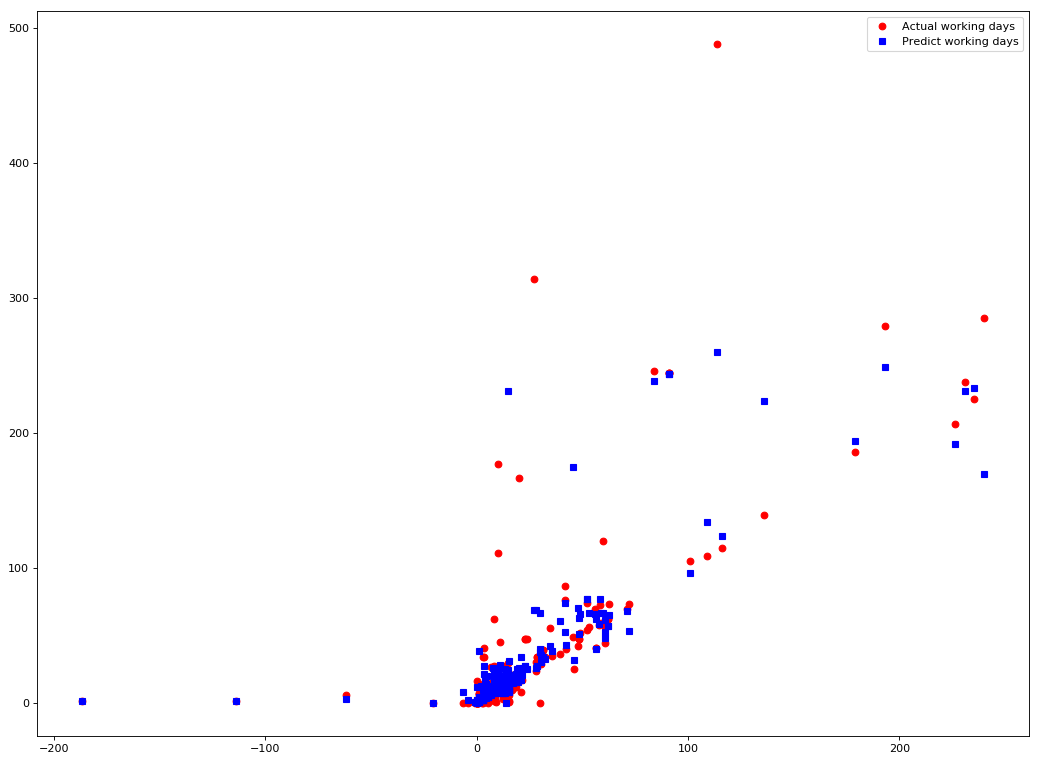

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ms_test,y_test,'ro',label='Actual working days')
plt.plot(ms_test,y_pred,'bs',label='Predict working days')
plt.legend()

#驗證